In [10]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [11]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [12]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.SHRINKAGE_PCA.value(),
)

In [13]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [14]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [12:22<00:00,  2.62s/it]


StrategyStatistics:
* final_nav = 8.714278
* geom_avg_total_r = 0.120605
* geom_avg_xs_r = 0.112826
* std_xs_r = 0.148524
* min_xs_r = -0.089349
* max_xs_r = 0.090504
* skew = 0.003491
* kurtosis = 12.124256
* max_dd = -0.266587
* sharpe = 0.759650
* alpha_buy_hold = 0.043033
* tracking_error_buy_hold = 0.177577
* ir_buy_hold = 0.242335
* factor_loadings = {'low_risk': 0.6193593033617142, 'momentum': -0.10889048488153366, 'quality': 0.10832623106233456, 'size': 0.05022182540993489, 'value': -0.2357851423400309, 'spx': 0.6421808811336409}
* alpha_benchmark = 0.050753
* alpha_benchmark_pvalue = 0.035981
* tracking_error_benchmark = 0.108093
* ir_benchmark = 0.469526
* ttest_pval = 0.326268
* levene_pval = 0.000000
* timing_ability_coef = -0.034630
* timing_ability_pval = 0.075153

In [15]:
result.std_xs_r, result.sharpe

(0.1485238455205704, 0.7596503430765993)

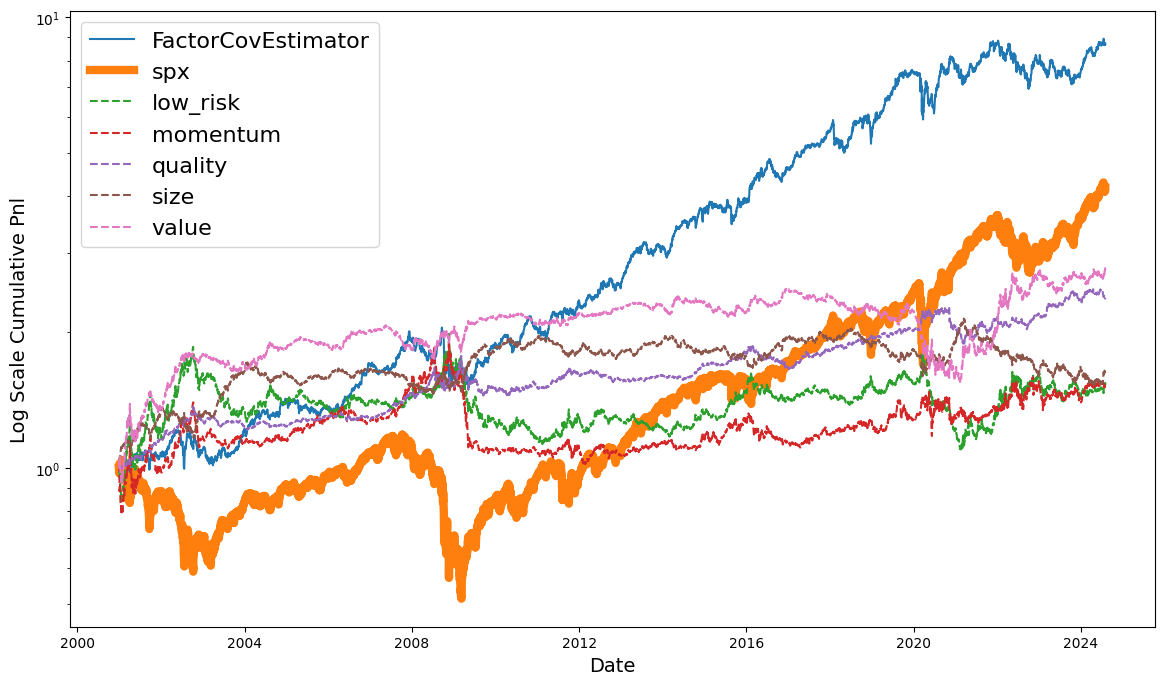

In [16]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

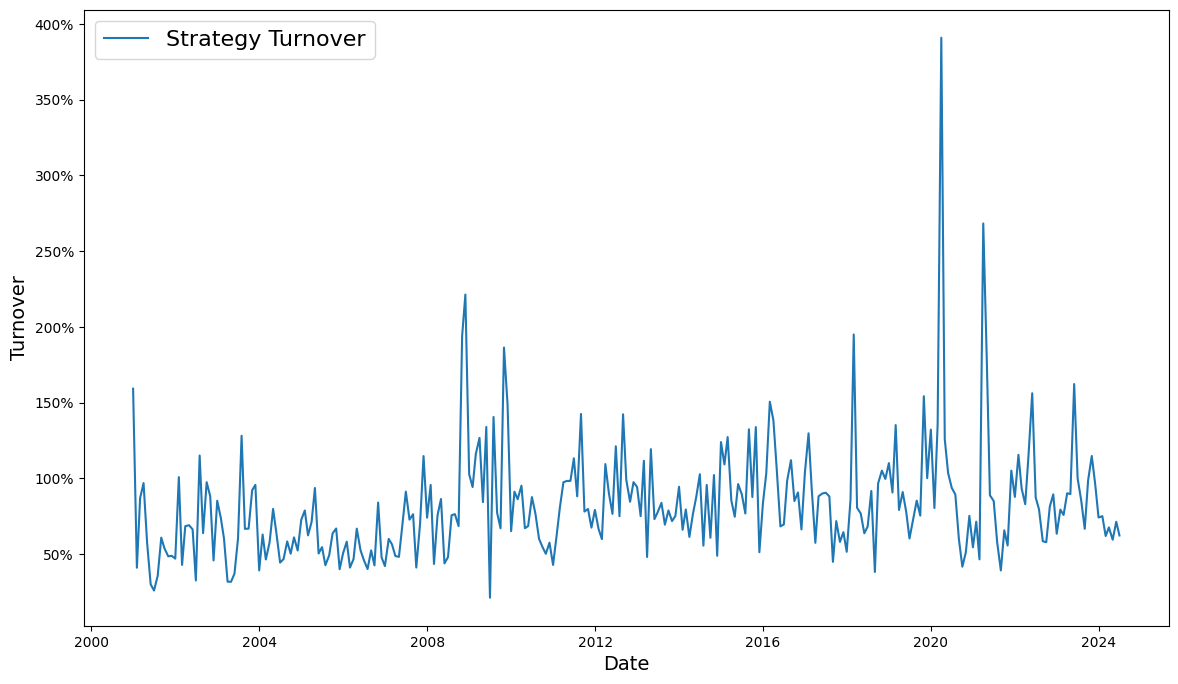

In [17]:
runner.plot_turnover()

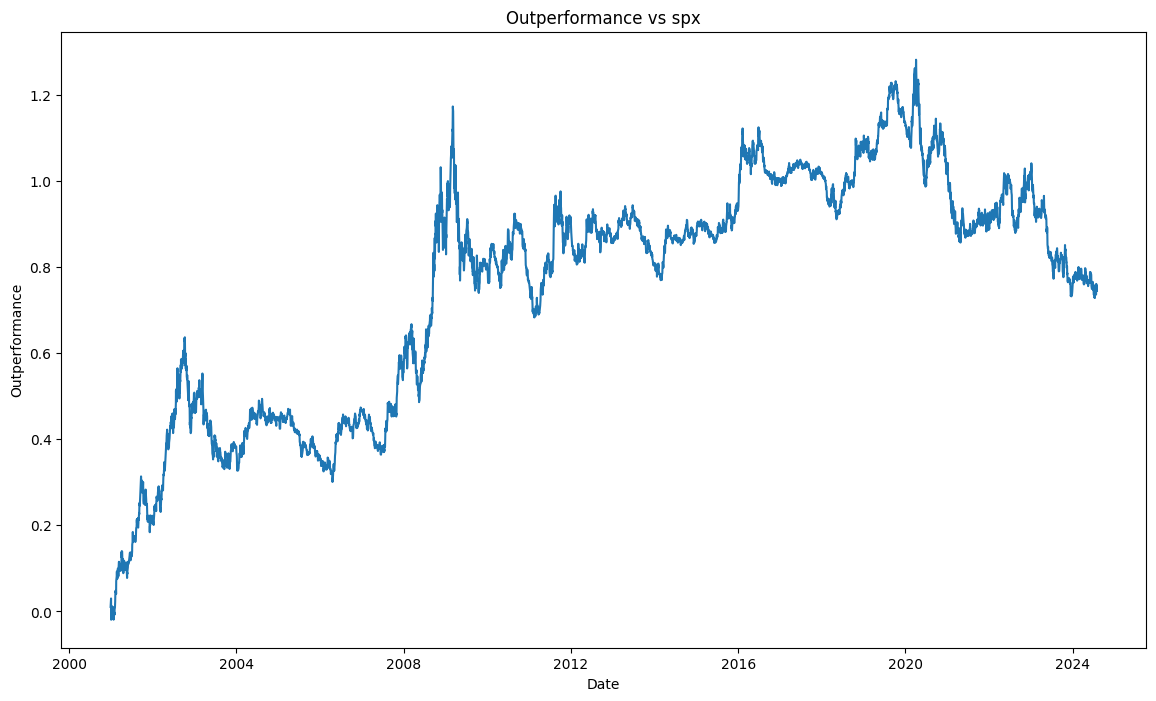

In [18]:
runner.plot_outperformance(mkt_only=True)

In [19]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")